In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


from crispr_millipede import encoding as cme
from crispr_millipede import modelling as cmm


In [2]:
import pandas as pd
import numpy as np

from Bio import SeqIO
from Bio.Seq import Seq

import matplotlib.pyplot as plt

In [3]:
amplicon = "ACATGCTCTAGTGAAAGCCAGTCTGGGCAGCTGGGTAGCTAATGAGGGGATTAGAGAGATTTTGTTGAATGAAAGGCAGATTGAGTCCTGCTACTCGCCCCCTTCATTCCCCTTCATTCATGCCTCATTCTTCCGCCTCCCAGCCGCCTCAACTGGCCAAAGGGAAGTGGAGGCCCTGCCACCTGTAGGGAGGGTCCCCTGGGGCTTGCCCACAGCAAACAGGAAGTCACAGCCTGGTGAGATGGGCCTGGGAATCAGCCACTGAGAAAGTGGGTCTCTTGGGTCCCTGAATTCTTTTTCTGAGTCCCTGCAGCAGTGAAAAAGACACAGAGGCACATAGAGAGTG"
print(f"Length of amplicon {len(amplicon)}")

Length of amplicon 346


In [29]:


design_matrix_spec = cmm.MillipedeDesignMatrixProcessingSpecification(
    wt_normalization=False,
    total_normalization=True,
    sigma_scale_normalized=True,
    decay_sigma_scale=True,
    K_enriched=10,
    K_baseline=10,
    a_parameter=0.0001,
    set_offset_as_presort = True,
    offset_normalized = False,
    offset_psuedocount = 1 # OTHERWISE will get infinity error when taking log(count +1) for offset, since 0 counts could be acceptable depending on thresholding
)

millipede_model_specification_set = {
    "joint_replicate_per_experiment_models" : cmm.MillipedeModelSpecification(
        model_types=[cmm.MillipedeModelType.NORMAL_SIGMA_SCALED, cmm.MillipedeModelType.NORMAL],
        replicate_merge_strategy=cmm.MillipedeReplicateMergeStrategy.COVARIATE,
        experiment_merge_strategy=cmm.MillipedeExperimentMergeStrategy.SEPARATE,
        S = 5,
        tau = 0.01,
        tau_intercept = 0.0001,
        cutoff_specification=cmm.MillipedeCutoffSpecification(
            per_replicate_each_condition_num_cutoff = 0, 
            per_replicate_all_condition_num_cutoff = 1, 
            all_replicate_num_cutoff = 0, 
            all_experiment_num_cutoff = 0,
            baseline_pop_all_condition_each_replicate_num_cutoff = 3,
            baseline_pop_all_condition_acceptable_rep_count = 2,
            enriched_pop_all_condition_each_replicate_num_cutoff = 3,
            enriched_pop_all_condition_acceptable_rep_count = 2,
            presort_pop_all_condition_each_replicate_num_cutoff = 3,
            presort_pop_all_condition_acceptable_rep_count = 2,
            
        ),
        design_matrix_processing_specification=design_matrix_spec
    )
}

In [30]:
paired_end_experiments_inputdata_denoised = cmm.MillipedeInputDataExperimentalGroup(
    data_directory="./", 
    enriched_pop_fn_experiment_list = ["20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_ABE8e_encodings_rep{}.tsv"],
    enriched_pop_df_reads_colname = "#Reads_CD19minus",
    baseline_pop_fn_experiment_list = ["20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_ABE8e_encodings_rep{}.tsv"],
    baseline_pop_df_reads_colname = "#Reads_CD19plus", 
    presort_pop_fn_experiment_list = ["20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_ABE8e_encodings_rep{}.tsv"],
    presort_pop_df_reads_colname = '#Reads_presort',
    experiment_labels = ["EvoCDA"],
    reps = [0,1,2],
    millipede_model_specification_set = millipede_model_specification_set
   )
#20240828_v0_1_84_sg219_encoding_dataframes_variantdenoised_removed_ABE8e_encodings_rep
#20240828_v0_1_84_sg219_encoding_dataframes_fulldenoised_removed_ABE8e_encodings_rep

Performing initial input validation checks...
Passed validation.
Retrieving data for
	Replicate Merge Strategy: MillipedeReplicateMergeStrategy.COVARIATE 
	Experiment Merge Strategy MillipedeExperimentMergeStrategy.SEPARATE
	Cutoff: 
                    per_replicate_each_condition_num_cutoff=0, 
                    per_replicate_presort_condition_num_cutoff=0, 
                    per_replicate_all_condition_num_cutoff=1, 
                    all_replicate_num_cutoff=0, 
                    all_experiment_num_cutoff=0, 
                    baseline_pop_per_condition_acceptable_rep_count=0, 
                    baseline_pop_per_condition_acceptable_rep_count=0, 
                    baseline_pop_per_condition_acceptable_rep_count=0,
                    enriched_pop_per_condition_each_replicate_num_cutoff=0,
                    enriched_pop_per_condition_acceptable_rep_count=0,
                    presort_pop_per_condition_each_replicate_num_cutoff=0,
                    presort_pop_per_

In [108]:
##Run QC Tests 

In [31]:
data = paired_end_experiments_inputdata_denoised.millipede_model_specification_set_with_data['joint_replicate_per_experiment_models'][1].data[0]
data1 = data[data['intercept_exp0_rep0'] == 1]
data2 = data[data['intercept_exp0_rep1'] == 1]
data3 = data[data['intercept_exp0_rep2'] == 1]

print(data)
print(data1)
print(data2)
print(data3)



      intercept_exp0_rep0  intercept_exp0_rep1  intercept_exp0_rep2  21T>C  \
0                     1.0                  0.0                  0.0      0   
1                     1.0                  0.0                  0.0      0   
2                     1.0                  0.0                  0.0      0   
3                     1.0                  0.0                  0.0      0   
4                     1.0                  0.0                  0.0      0   
...                   ...                  ...                  ...    ...   
1173                  0.0                  0.0                  1.0      0   
1174                  0.0                  0.0                  1.0      0   
1175                  0.0                  0.0                  1.0      1   
1176                  0.0                  0.0                  1.0      1   
1177                  0.0                  0.0                  1.0      1   

      23T>C  28A>G  31T>C  35T>C  36A>G  39T>C  ...  #Reads_CD1

In [32]:
merged_encodings_millipede_rep0_rep1 = pd.merge(left=data1, right=data2, how="outer", on=[col for col in data2.columns if ">" in col], suffixes=("_rep0", "_rep1"))
merged_encodings_millipede_rep0_rep2 = pd.merge(left=data1, right=data3, how="outer", on=[col for col in data2.columns if ">" in col], suffixes=("_rep0", "_rep2"))
merged_encodings_millipede_rep1_rep2 = pd.merge(left=data2, right=data3, how="outer", on=[col for col in data2.columns if ">" in col], suffixes=("_rep1", "_rep2"))


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/MilliV2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


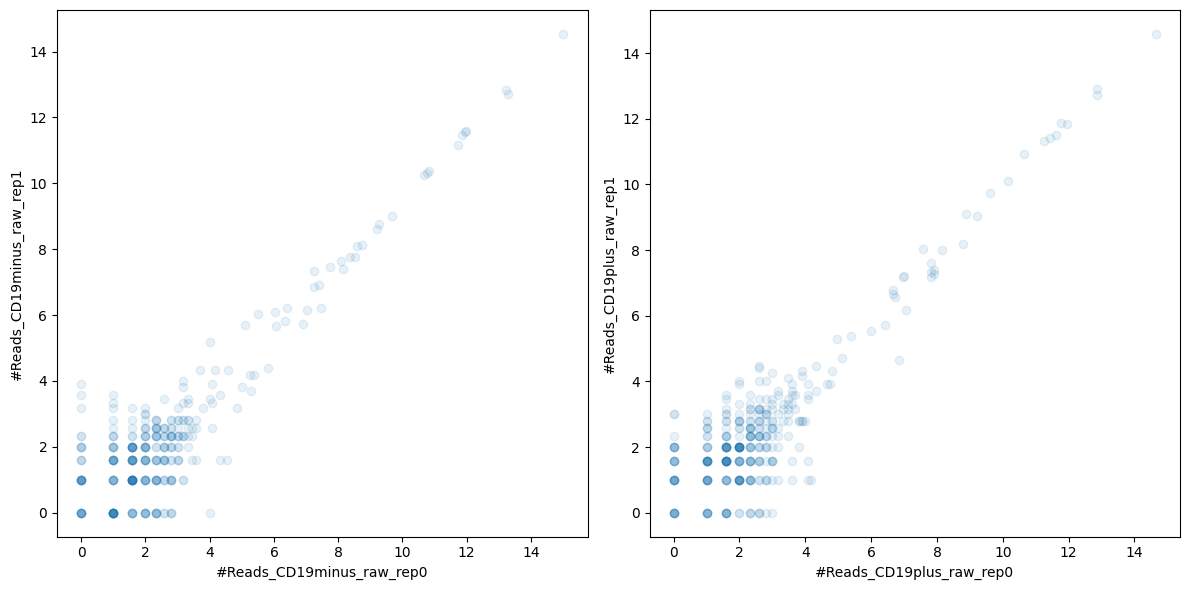

In [33]:
merged_encodings_millipede_rep0_rep1_minus_plus = merged_encodings_millipede_rep0_rep1[['#Reads_CD19minus_raw_rep0', '#Reads_CD19minus_raw_rep1', '#Reads_CD19plus_raw_rep0', '#Reads_CD19plus_raw_rep1',
                                                                                       '#Reads_CD19minus_rep0', '#Reads_CD19minus_rep1', '#Reads_CD19plus_rep0', '#Reads_CD19plus_rep1',
                                                                                       'score_rep0','score_rep1']]
merged_encodings_millipede_rep0_rep1_minus_plus = merged_encodings_millipede_rep0_rep1_minus_plus.dropna()
merged_encodings_millipede_rep0_rep1_minus_plus = merged_encodings_millipede_rep0_rep1_minus_plus.drop(merged_encodings_millipede_rep0_rep1_minus_plus.index[0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot
ax1.scatter(np.log2(merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19minus_raw_rep0']),
            np.log2(merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19minus_raw_rep1']),
            alpha=0.1)
ax1.set_xlabel('#Reads_CD19minus_raw_rep0')
ax1.set_ylabel('#Reads_CD19minus_raw_rep1')

# Plot the second scatter plot
ax2.scatter(np.log2(merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19plus_raw_rep0']),
            np.log2(merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19plus_raw_rep1']),
            alpha=0.1)
ax2.set_xlabel('#Reads_CD19plus_raw_rep0')
ax2.set_ylabel('#Reads_CD19plus_raw_rep1')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()









/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/MilliV2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


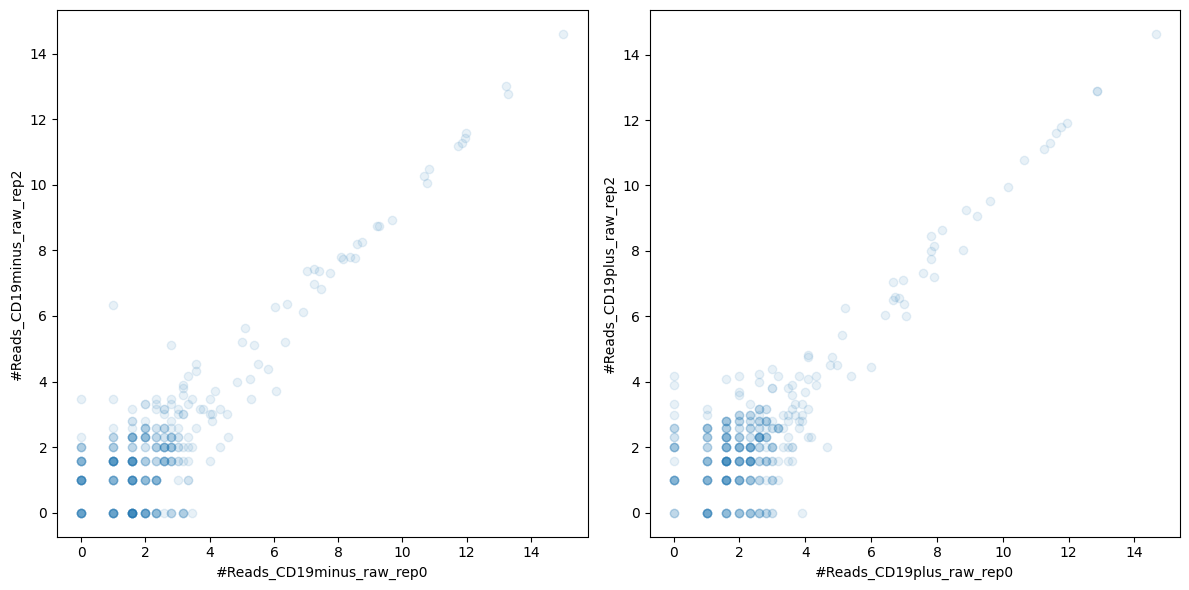

In [34]:
merged_encodings_millipede_rep0_rep2_minus_plus = merged_encodings_millipede_rep0_rep2[['#Reads_CD19minus_raw_rep0', '#Reads_CD19minus_raw_rep2', '#Reads_CD19plus_raw_rep0', '#Reads_CD19plus_raw_rep2',
                                                                                       '#Reads_CD19minus_rep0', '#Reads_CD19minus_rep2', '#Reads_CD19plus_rep0', '#Reads_CD19plus_rep2',
                                                                                       'score_rep0', 'score_rep2']]
merged_encodings_millipede_rep0_rep2_minus_plus = merged_encodings_millipede_rep0_rep2_minus_plus.dropna()
merged_encodings_millipede_rep0_rep2_minus_plus = merged_encodings_millipede_rep0_rep2_minus_plus.drop(merged_encodings_millipede_rep0_rep2_minus_plus.index[0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot
ax1.scatter(np.log2(merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19minus_raw_rep0']),
            np.log2(merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19minus_raw_rep2']),
            alpha=0.1)
ax1.set_xlabel('#Reads_CD19minus_raw_rep0')
ax1.set_ylabel('#Reads_CD19minus_raw_rep2')

# Plot the second scatter plot
ax2.scatter(np.log2(merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19plus_raw_rep0']),
            np.log2(merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19plus_raw_rep2']),
            alpha=0.1)
ax2.set_xlabel('#Reads_CD19plus_raw_rep0')
ax2.set_ylabel('#Reads_CD19plus_raw_rep2')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/MilliV2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


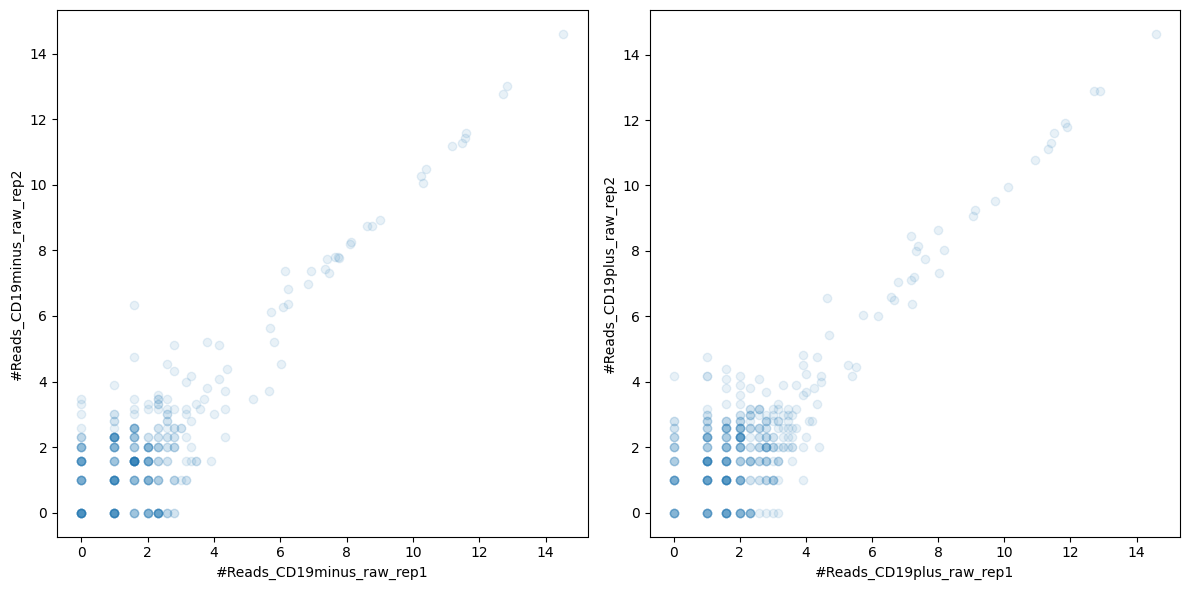

In [35]:
merged_encodings_millipede_rep1_rep2_minus_plus = merged_encodings_millipede_rep1_rep2[['#Reads_CD19minus_raw_rep1', '#Reads_CD19minus_raw_rep2', '#Reads_CD19plus_raw_rep1', '#Reads_CD19plus_raw_rep2',
                                                                                       '#Reads_CD19minus_rep1', '#Reads_CD19minus_rep2', '#Reads_CD19plus_rep1', '#Reads_CD19plus_rep2',
                                                                                       'score_rep1', 'score_rep2']]
merged_encodings_millipede_rep1_rep2_minus_plus = merged_encodings_millipede_rep1_rep2_minus_plus.dropna()
merged_encodings_millipede_rep1_rep2_minus_plus = merged_encodings_millipede_rep1_rep2_minus_plus.drop(merged_encodings_millipede_rep1_rep2_minus_plus.index[0])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot
ax1.scatter(np.log2(merged_encodings_millipede_rep1_rep2_minus_plus['#Reads_CD19minus_raw_rep1']),
            np.log2(merged_encodings_millipede_rep1_rep2_minus_plus['#Reads_CD19minus_raw_rep2']),
            alpha=0.1)
ax1.set_xlabel('#Reads_CD19minus_raw_rep1')
ax1.set_ylabel('#Reads_CD19minus_raw_rep2')

# Plot the second scatter plot
ax2.scatter(np.log2(merged_encodings_millipede_rep1_rep2_minus_plus['#Reads_CD19plus_raw_rep1']),
            np.log2(merged_encodings_millipede_rep1_rep2_minus_plus['#Reads_CD19plus_raw_rep2']),
            alpha=0.1)
ax2.set_xlabel('#Reads_CD19plus_raw_rep1')
ax2.set_ylabel('#Reads_CD19plus_raw_rep2')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [36]:
merged_encodings_millipede_rep0_rep1_minus_plus['NormSumRep0'] = merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19plus_rep0'] + merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19minus_rep0']
merged_encodings_millipede_rep0_rep1_minus_plus['NormSumRep1'] = merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19plus_rep1'] + merged_encodings_millipede_rep0_rep1_minus_plus['#Reads_CD19minus_rep1']
merged_encodings_millipede_rep0_rep2_minus_plus['NormSumRep2'] = merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19plus_rep2'] + merged_encodings_millipede_rep0_rep2_minus_plus['#Reads_CD19minus_rep2']



/tmp/ipykernel_65087/1804567687.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bins'] = pd.cut(df['NormSumRep0'], bins)


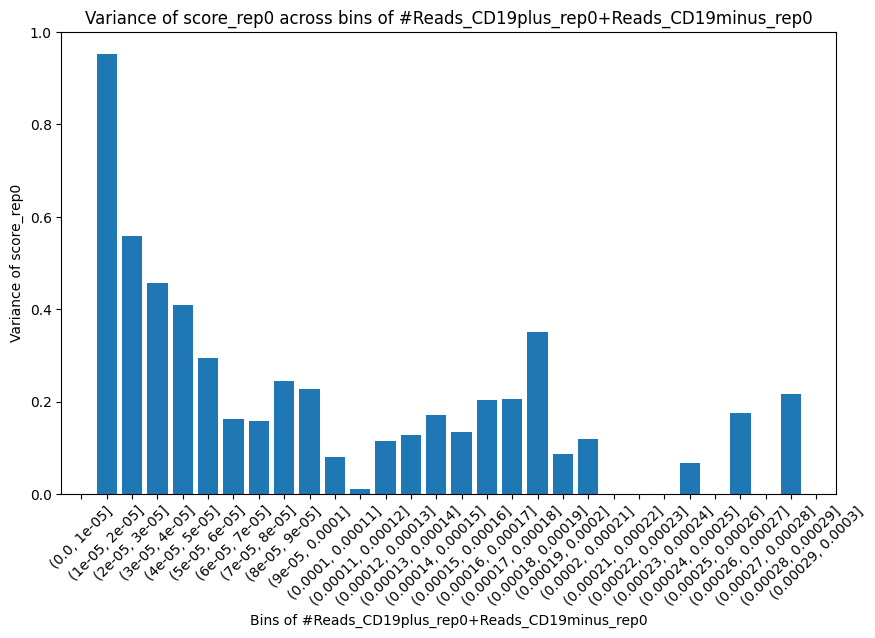

In [38]:
df = merged_encodings_millipede_rep0_rep1_minus_plus[['NormSumRep0', 'score_rep0']]

#0.00001
#0.0002

# Create bins
bin_width = 0.00001  # You can adjust this to 0.0005 or another value as needed
bins = np.arange(0, 0.0003 + bin_width, bin_width)  # Create bins from 0 to 0.005 with the specified width

df['bins'] = pd.cut(df['NormSumRep0'], bins)

# Compute variance for each bin
variance_per_bin = df.groupby('bins')['score_rep0'].var().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(variance_per_bin['bins'].astype(str), variance_per_bin['score_rep0'], width=0.8)
plt.xlabel('Bins of #Reads_CD19plus_rep0+Reads_CD19minus_rep0')
plt.ylabel('Variance of score_rep0')
plt.title('Variance of score_rep0 across bins of #Reads_CD19plus_rep0+Reads_CD19minus_rep0')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_65087/2479623783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bins'] = pd.cut(df['NormSumRep1'], bins)


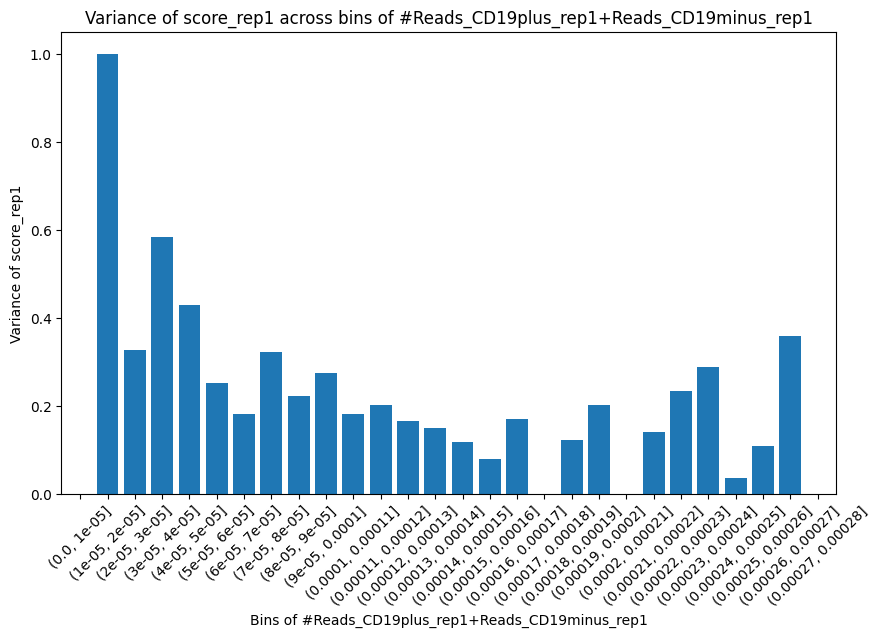

In [39]:
df = merged_encodings_millipede_rep0_rep1_minus_plus[['NormSumRep1', 'score_rep1']]

# Create bins
bin_width = 0.00001  # You can adjust this to 0.0005 or another value as needed
bins = np.arange(0, 0.0003 + bin_width, bin_width)  # Create bins from 0 to 0.005 with the specified width

df['bins'] = pd.cut(df['NormSumRep1'], bins)

# Compute variance for each bin
variance_per_bin = df.groupby('bins')['score_rep1'].var().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(variance_per_bin['bins'].astype(str), variance_per_bin['score_rep1'], width=0.8)
plt.xlabel('Bins of #Reads_CD19plus_rep1+Reads_CD19minus_rep1')
plt.ylabel('Variance of score_rep1')
plt.title('Variance of score_rep1 across bins of #Reads_CD19plus_rep1+Reads_CD19minus_rep1')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_65087/3509964133.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bins'] = pd.cut(df['NormSumRep2'], bins)


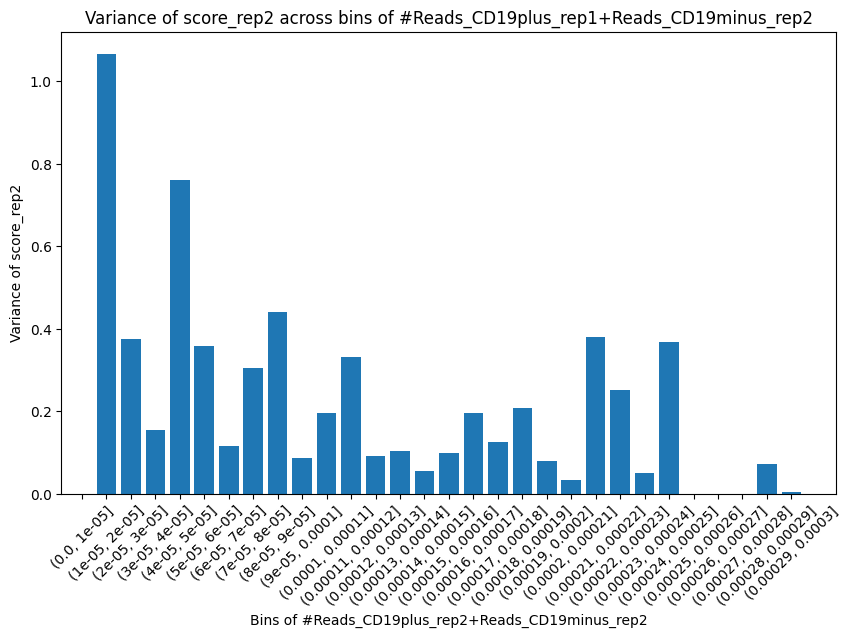

In [40]:
df = merged_encodings_millipede_rep0_rep2_minus_plus[['NormSumRep2', 'score_rep2']]

# Create bins
bin_width = 0.00001  # You can adjust this to 0.0005 or another value as needed
bins = np.arange(0,0.0003 + bin_width, bin_width)  # Create bins from 0 to 0.005 with the specified width

df['bins'] = pd.cut(df['NormSumRep2'], bins)

# Compute variance for each bin
variance_per_bin = df.groupby('bins')['score_rep2'].var().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(variance_per_bin['bins'].astype(str), variance_per_bin['score_rep2'], width=0.8)
plt.xlabel('Bins of #Reads_CD19plus_rep2+Reads_CD19minus_rep2')
plt.ylabel('Variance of score_rep2')
plt.title('Variance of score_rep2 across bins of #Reads_CD19plus_rep1+Reads_CD19minus_rep2')
plt.xticks(rotation=45)
plt.show()


In [13]:
def collapse_columns(df):
    
    df_a = df.copy()
    df_b = df.copy()
    df_c = df.copy()
    
    # Populate the reads column
    df_a['reads'] = df_a['#Reads_CD19minus_raw']
    df_b['reads'] = df_b['#Reads_CD19plus_raw']
    df_c['reads'] = df_c['#Reads_presort_raw']
    
    #Create indicator columns
    df_a['Minus'] = 1
    df_a['Plus'] = 0
    df_a['Presort'] = 0
    
    df_b['Minus'] = 0
    df_b['Plus'] = 1
    df_b['Presort'] = 0
    
    df_c['Minus'] = 0
    df_c['Plus'] = 0
    df_c['Presort'] = 1
    
    result_df = pd.concat([df_a, df_b, df_c], ignore_index = True)
    

    
    return result_df


In [14]:
dataCollapsed1 = collapse_columns(data1)
dataCollapsed2 = collapse_columns(data2)
dataCollapsed3 = collapse_columns(data3)
dataCollapsed3

,intercept_exp0_rep0,intercept_exp0_rep1,intercept_exp0_rep2,218A>G,220A>G,223A>G,224A>G,226T>C,228A>G,#Reads_CD19minus,...,#Reads_CD19minus_raw,#Reads_CD19plus_raw,#Reads_presort_raw,score,scale_factor,psi0,reads,Minus,Plus,Presort
0,0.0,0.0,1.0,0,0,0,0,0,0,0.120785,...,12095.0,27781.0,25322.0,-0.317913,1.000000,10.139468,12095.0,1,0,0
1,0.0,0.0,1.0,0,0,0,0,0,1,0.017326,...,1735.0,3295.0,3029.0,-0.230051,1.000000,8.016318,1735.0,1,0,0
2,0.0,0.0,1.0,0,0,0,0,1,0,0.000100,...,10.0,16.0,21.0,-0.147463,1.048454,3.091042,10.0,1,0,0
3,0.0,0.0,1.0,0,0,0,1,0,0,0.002696,...,270.0,256.0,188.0,0.112599,1.000000,5.241747,270.0,1,0,0
4,0.0,0.0,1.0,0,0,0,1,0,1,0.007480,...,749.0,973.0,997.0,-0.044338,1.000000,6.905753,749.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.0,0.0,1.0,1,1,0,1,0,1,0.000050,...,5.0,0.0,0.0,1.000000,5.401262,0.000000,0.0,0,0,1
83,0.0,0.0,1.0,1,1,1,0,0,0,0.000040,...,4.0,4.0,36.0,0.086241,2.486717,3.610918,36.0,0,0,1
84,0.0,0.0,1.0,1,1,1,0,0,1,0.000110,...,11.0,42.0,5.0,-0.525155,1.025414,1.791759,5.0,0,0,1
85,0.0,0.0,1.0,1,1,1,1,0,0,0.000889,...,89.0,102.0,201.0,0.018286,1.000000,5.308268,201.0,0,0,1


In [15]:
final_df = pd.concat([dataCollapsed1, dataCollapsed2, dataCollapsed3], ignore_index = True)
final_df

,intercept_exp0_rep0,intercept_exp0_rep1,intercept_exp0_rep2,218A>G,220A>G,223A>G,224A>G,226T>C,228A>G,#Reads_CD19minus,...,#Reads_CD19minus_raw,#Reads_CD19plus_raw,#Reads_presort_raw,score,scale_factor,psi0,reads,Minus,Plus,Presort
0,1.0,0.0,0.0,0,0,0,0,0,0,0.129287,...,17359.0,37529.0,26098.0,-0.348757,1.000000,10.169652,17359.0,1,0,0
1,1.0,0.0,0.0,0,0,0,0,0,1,0.020325,...,2729.0,3863.0,2882.0,-0.151115,1.000000,7.966587,2729.0,1,0,0
2,1.0,0.0,0.0,0,0,0,0,1,0,0.000074,...,10.0,17.0,7.0,-0.239120,1.144571,2.079442,10.0,1,0,0
3,1.0,0.0,0.0,0,0,0,1,0,0,0.002577,...,346.0,268.0,326.0,0.148102,1.000000,5.789960,346.0,1,0,0
4,1.0,0.0,0.0,0,0,0,1,0,1,0.007634,...,1025.0,907.0,912.0,0.082439,1.000000,6.816736,1025.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.0,0.0,1.0,1,1,0,1,0,1,0.000050,...,5.0,0.0,0.0,1.000000,5.401262,0.000000,0.0,0,0,1
263,0.0,0.0,1.0,1,1,1,0,0,0,0.000040,...,4.0,4.0,36.0,0.086241,2.486717,3.610918,36.0,0,0,1
264,0.0,0.0,1.0,1,1,1,0,0,1,0.000110,...,11.0,42.0,5.0,-0.525155,1.025414,1.791759,5.0,0,0,1
265,0.0,0.0,1.0,1,1,1,1,0,0,0.000889,...,89.0,102.0,201.0,0.018286,1.000000,5.308268,201.0,0,0,1


In [16]:
nt_columns = [col for col in final_df.columns if ">" in col]
final_df['Covariate_ID'] = final_df[nt_columns].astype(str).agg('_'.join, axis = 1)
final_df

,intercept_exp0_rep0,intercept_exp0_rep1,intercept_exp0_rep2,218A>G,220A>G,223A>G,224A>G,226T>C,228A>G,#Reads_CD19minus,...,#Reads_CD19plus_raw,#Reads_presort_raw,score,scale_factor,psi0,reads,Minus,Plus,Presort,Covariate_ID
0,1.0,0.0,0.0,0,0,0,0,0,0,0.129287,...,37529.0,26098.0,-0.348757,1.000000,10.169652,17359.0,1,0,0,0_0_0_0_0_0
1,1.0,0.0,0.0,0,0,0,0,0,1,0.020325,...,3863.0,2882.0,-0.151115,1.000000,7.966587,2729.0,1,0,0,0_0_0_0_0_1
2,1.0,0.0,0.0,0,0,0,0,1,0,0.000074,...,17.0,7.0,-0.239120,1.144571,2.079442,10.0,1,0,0,0_0_0_0_1_0
3,1.0,0.0,0.0,0,0,0,1,0,0,0.002577,...,268.0,326.0,0.148102,1.000000,5.789960,346.0,1,0,0,0_0_0_1_0_0
4,1.0,0.0,0.0,0,0,0,1,0,1,0.007634,...,907.0,912.0,0.082439,1.000000,6.816736,1025.0,1,0,0,0_0_0_1_0_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0.0,0.0,1.0,1,1,0,1,0,1,0.000050,...,0.0,0.0,1.000000,5.401262,0.000000,0.0,0,0,1,1_1_0_1_0_1
263,0.0,0.0,1.0,1,1,1,0,0,0,0.000040,...,4.0,36.0,0.086241,2.486717,3.610918,36.0,0,0,1,1_1_1_0_0_0
264,0.0,0.0,1.0,1,1,1,0,0,1,0.000110,...,42.0,5.0,-0.525155,1.025414,1.791759,5.0,0,0,1,1_1_1_0_0_1
265,0.0,0.0,1.0,1,1,1,1,0,0,0.000889,...,102.0,201.0,0.018286,1.000000,5.308268,201.0,0,0,1,1_1_1_1_0_0


In [17]:
# Step 1: Melt the dataframe to convert replicate indicators into a long format
melted_df = final_df.melt(id_vars=['Covariate_ID', '#Reads_CD19minus_raw', '#Reads_CD19plus_raw', '#Reads_presort_raw'], 
                          value_vars=['intercept_exp0_rep0', 'intercept_exp0_rep1', 'intercept_exp0_rep2'],
                          var_name='replicate', value_name='rep_value')

# Filter out rows where rep_value is 0
melted_df = melted_df[melted_df['rep_value'] == 1]

pivoted_df = melted_df.pivot_table(index='Covariate_ID', columns='replicate', 
                                   values=['#Reads_CD19minus_raw', '#Reads_CD19plus_raw', '#Reads_presort_raw'])



pivoted_df


#Reads_CD19minus_raw                                          \
replicate     intercept_exp0_rep0 intercept_exp0_rep1 intercept_exp0_rep2   
Covariate_ID                                                                
0_0_0_0_0_0               17359.0             11722.0             12095.0   
0_0_0_0_0_1                2729.0              1882.0              1735.0   
0_0_0_0_1_0                  10.0                12.0                10.0   
0_0_0_1_0_0                 346.0               227.0               270.0   
0_0_0_1_0_1                1025.0               635.0               749.0   
0_0_1_0_0_0                1214.0               759.0               920.0   
0_0_1_0_0_1                2874.0              2146.0              2336.0   
0_0_1_1_0_0                5654.0              3697.0              4001.0   
0_0_1_1_0_1                6827.0              4905.0              4481.0   
0_1_0_0_0_0                 488.0               369.0               382.0   
0_1_0_0_0_1                 294.0               210.0               389.0   
0_1_0_1_0_0                 158.0               141.0               151.0   
0_1_0_1_0_1                 761.0               486.0               535.0   
0_1_1_0_0_0                6488.0              4587.0              4357.0   
0_1_1_0_0_1                6747.0              4868.0              5123.0   
0_1_1_0_1_1                   1.0                 3.0                 2.0   
0_1_1_1_0_0               17188.0             11401.0             12208.0   
0_1_1_1_0_1               63237.0             44763.0             49811.0   
0_1_1_1_1_0                   8.0                 3.0                 1.0   
0_1_1_1_1_1                   9.0                 6.0                11.0   
1_0_0_0_0_0                   8.0                19.0                 4.0   
1_0_0_0_0_1                   1.0                 1.0                 0.0   
1_0_1_0_0_1                   9.0                 4.0                 NaN   
1_0_1_1_0_0                   4.0                 1.0                 2.0   
1_0_1_1_0_1                   5.0                14.0                 1.0   
1_1_0_1_0_1                   4.0                21.0                 5.0   
1_1_1_0_0_0                  14.0                 9.0                 4.0   
1_1_1_0_0_1                   6.0                12.0                11.0   
1_1_1_1_0_0                  87.0               112.0                89.0   
1_1_1_1_0_1                 712.0               550.0               454.0   

             #Reads_CD19plus_raw                                          \
replicate    intercept_exp0_rep0 intercept_exp0_rep1 intercept_exp0_rep2   
Covariate_ID                                                               
0_0_0_0_0_0              37529.0             35765.0             27781.0   
0_0_0_0_0_1               3863.0              3747.0              3295.0   
0_0_0_0_1_0                 17.0                35.0                16.0   
0_0_0_1_0_0                268.0               243.0               256.0   
0_0_0_1_0_1                907.0               959.0               973.0   
0_0_1_0_0_0               1453.0              1456.0              1243.0   
0_0_1_0_0_1               2692.0              3101.0              2588.0   
0_0_1_1_0_0               4792.0              4309.0              3976.0   
0_0_1_1_0_1               5872.0              5190.0              5250.0   
0_1_0_0_0_0                726.0               465.0               428.0   
0_1_0_0_0_1                434.0               310.0               356.0   
0_1_0_1_0_0                292.0               161.0               127.0   
0_1_0_1_0_1                590.0               479.0               432.0   
0_1_1_0_0_0               6153.0              5927.0              5508.0   
0_1_1_0_0_1               6911.0              5861.0              6108.0   
0_1_1_0_1_1                  2.0                 1.0                 2.0   
0_1_1_1_0_0              14

In [18]:
# Flatten the multi-level columns
pivoted_df.columns = [f'{var}rep{rep}' for var, rep in pivoted_df.columns]

# Reset index to get Covariate_ID back as a column
pivoted_df.reset_index(inplace=True)

pivoted_df = pivoted_df.fillna(0)

# Create a mask where all values in the row are greater than 0
#mask = (pivoted_df.iloc[:, 1:] > 0).all(axis=1)

# Apply the mask to keep only rows where all columns have a value > 0
#pivoted_df = pivoted_df[mask]

#mask = (pivoted_df.iloc[:, 7:] > 50).all(axis=1) #PRESORT > 10
#pivoted_df = pivoted_df[mask]



pivoted_df

,Covariate_ID,#Reads_CD19minus_rawrepintercept_exp0_rep0,#Reads_CD19minus_rawrepintercept_exp0_rep1,#Reads_CD19minus_rawrepintercept_exp0_rep2,#Reads_CD19plus_rawrepintercept_exp0_rep0,#Reads_CD19plus_rawrepintercept_exp0_rep1,#Reads_CD19plus_rawrepintercept_exp0_rep2,#Reads_presort_rawrepintercept_exp0_rep0,#Reads_presort_rawrepintercept_exp0_rep1,#Reads_presort_rawrepintercept_exp0_rep2
0,0_0_0_0_0_0,17359.0,11722.0,12095.0,37529.0,35765.0,27781.0,26098.0,28987.0,25322.0
1,0_0_0_0_0_1,2729.0,1882.0,1735.0,3863.0,3747.0,3295.0,2882.0,3291.0,3029.0
2,0_0_0_0_1_0,10.0,12.0,10.0,17.0,35.0,16.0,7.0,11.0,21.0
3,0_0_0_1_0_0,346.0,227.0,270.0,268.0,243.0,256.0,326.0,351.0,188.0
4,0_0_0_1_0_1,1025.0,635.0,749.0,907.0,959.0,973.0,912.0,981.0,997.0
5,0_0_1_0_0_0,1214.0,759.0,920.0,1453.0,1456.0,1243.0,1180.0,1398.0,1421.0
6,0_0_1_0_0_1,2874.0,2146.0,2336.0,2692.0,3101.0,2588.0,2628.0,2719.0,3170.0
7,0_0_1_1_0_0,5654.0,3697.0,4001.0,4792.0,4309.0,3976.0,4654.0,4651.0,4007.0
8,0_0_1_1_0_1,6827.0,4905.0,4481.0,5872.0,5190.0,5250.0,5737.0,5894.0,5841.0
9,0_1_0_0_0_0,488.0,369.0,382.0,726.0,465.0,428.0,613.0,619.0,507.0


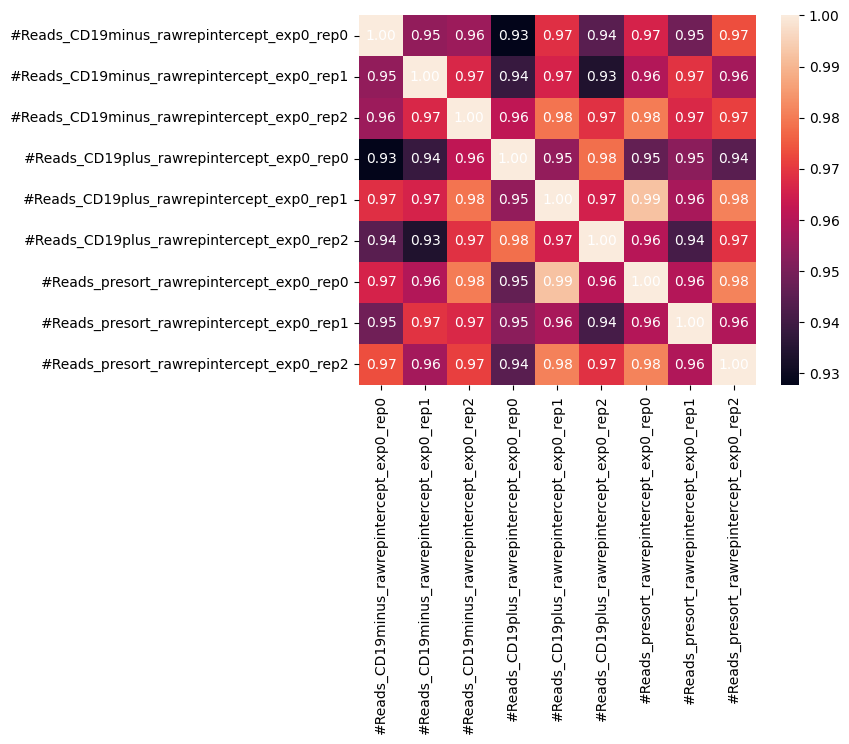

In [20]:
#Non Normalized Correlation Heatmap
import seaborn as sns

count_columns = [col for col in pivoted_df.columns if 'Reads' in col]
counts_df = pivoted_df[count_columns].transpose()

corr_df1 = counts_df.T.corr(method='spearman')


ax = sns.heatmap(corr_df1, annot=False)

# Loop over the data dimensions and create text annotations.
for i in range(corr_df1.shape[0]):
    for j in range(corr_df1.shape[1]):
        ax.text(j + 0.5, i + 0.5, 
                f'{corr_df1.iloc[i, j]:.2f}',  # Format the annotation as desired
                ha='center', va='center', color='white')

plt.show()



In [41]:
%%time
from crispr_millipede import encoding as cme
from crispr_millipede import modelling as cmm

paired_end_experiments_models_denoised = cmm.MillipedeModelExperimentalGroup(experiments_inputdata=paired_end_experiments_inputdata_denoised, device=cmm.MillipedeComputeDevice.GPU)


Start model inference for all provided model specifications: 1 total
Starting model inference for model specification id 1/1: joint_replicate_per_experiment_models
Number of single matrices: 1
With 2 model types, the total models to inference for this model specification: 2
Running model(s) for single matrix index: 1/1
Iterating through all 2 provided models: 
Preparing data for model NORMAL_SIGMA_SCALED, 1/2
Running model NORMAL_SIGMA_SCALED


  0%|          | 0/5500 [00:00<?, ?it/s]

Preparing data for model NORMAL, 2/2
Running model NORMAL


  0%|          | 0/5500 [00:00<?, ?it/s]

CPU times: user 34.5 s, sys: 639 ms, total: 35.1 s
Wall time: 33.4 s


In [42]:
beta_df = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results['joint_replicate_per_experiment_models'].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL_SIGMA_SCALED].beta
pip_df = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results['joint_replicate_per_experiment_models'].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL_SIGMA_SCALED].pip
display(beta_df.sort_values(ascending=False).head(40))
display(pip_df.sort_values(ascending=False).head(40))

230A>G                 0.164862
224A>G                 0.160217
223A>G                 0.054676
220A>G                 0.021987
intercept_exp0_rep1    0.016616
131T>C                 0.009484
62T>C                  0.007856
199T>C                 0.006385
254T>C                 0.005878
186A>G                 0.005491
206T>C                 0.003885
324A>G                 0.003515
151A>G                 0.003137
103T>C                 0.003102
205T>C                 0.002345
308T>C                 0.002025
127T>C                 0.001788
190A>G                 0.001166
51T>C                  0.001123
126A>G                 0.001017
117T>C                 0.000924
40A>G                  0.000868
213A>G                 0.000812
158A>G                 0.000721
150A>G                 0.000691
54A>G                  0.000675
69T>C                  0.000660
107T>C                 0.000633
23T>C                  0.000591
237T>C                 0.000577
256A>G                 0.000514
80T>C   

230A>G    1.000000
224A>G    0.999938
223A>G    0.537543
220A>G    0.191130
278T>C    0.048953
199T>C    0.033409
289A>G    0.028644
62T>C     0.025121
50T>C     0.024062
241A>G    0.023119
320A>G    0.019351
254T>C    0.018100
252A>G    0.016569
131T>C    0.016339
159A>G    0.016296
308T>C    0.015071
206T>C    0.014296
186A>G    0.013886
141A>G    0.013610
170A>G    0.013485
242T>C    0.013004
324A>G    0.012639
72A>G     0.011972
279T>C    0.011221
151A>G    0.011203
103T>C    0.011072
35T>C     0.009863
117T>C    0.009388
127T>C    0.009226
211A>G    0.009042
77A>G     0.008875
205T>C    0.008632
194T>C    0.008411
91T>C     0.007941
270T>C    0.007930
158A>G    0.007604
126A>G    0.007291
302A>G    0.007246
183T>C    0.007182
113T>C    0.007148
Name: PIP, dtype: float64

In [153]:
beta_df = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results['joint_replicate_per_experiment_models'].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL].beta
pip_df = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results['joint_replicate_per_experiment_models'].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL].pip
display(beta_df.sort_values(ascending=False).head(40))
display(pip_df.sort_values(ascending=False).head(40))

intercept_exp0_rep1    0.195477
218A>G                 0.026805
224A>G                 0.025688
220A>G                 0.021099
Intercept              0.008955
223A>G                 0.007805
228A>G                 0.001056
226T>C                -0.000827
intercept_exp0_rep0   -0.063569
intercept_exp0_rep2   -0.130239
Name: Coefficient, dtype: float64

218A>G    0.162961
224A>G    0.151067
220A>G    0.130310
223A>G    0.066543
226T>C    0.032389
228A>G    0.024483
Name: PIP, dtype: float64

In [45]:
paired_merged_raw_encodings = cmm.RawEncodingDataframesExperimentalGroup().read_in_files_constructor(
    enriched_pop_fn_encodings_experiment_list=["./20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_CD19minus_ABE8e_encodings_rep{}.pkl"],
    baseline_pop_fn_encodings_experiment_list=["./20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_CD19plus_ABE8e_encodings_rep{}.pkl"], 
    presort_pop_fn_encodings_experiment_list=["./20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_presort_ABE8e_encodings_rep{}.pkl"],
    experiment_labels=["EvoCDA"],
    ctrl_pop_fn_encodings="./20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_wt_encodings_rep0.pkl",
    ctrl_pop_labels="WT",
    reps=[0,1,2])
paired_merged_raw_encodings_editing_freqs = cmm.EncodingEditingFrequenciesExperimentalGroup(paired_merged_raw_encodings)

['./20240905_v0_1_89_sg219_encoding_dataframes_variantdenoised_removed_CRISPResso2Merged_trimmed_CD19minus_ABE8e_encodings_rep{}.pkl']
Reading enriched population...
Reading baseline population...
Reading presort population if provided...
Reading control population if provided...
Passed post-validation
ctrl_pop_encoding_editing_freq_avg_level was set to max depth of ctrl_pop_encodings_df_list, so no average was calculated
ctrl_pop_encoding_editing_freq_avg_level was set to max depth of ctrl_pop_encodings_df_list, so no average was calculated


In [47]:
paired_merged_raw_encodings_editing_freqs.presort_pop_encoding_editing_per_variant_freq_avg[0]

FullChange
21T>C     0.000348
23T>C     0.000230
28A>G     0.000317
31T>C     0.000267
35T>C     0.000813
            ...   
319A>G    0.000249
320A>G    0.000138
321A>G    0.000324
322A>G    0.000885
324A>G    0.000303
Length: 137, dtype: float64

In [48]:
paired_merged_raw_encodings_editing_freqs.presort_pop_encoding_editing_per_variant_freq_avg[0].to_csv('presort_editing_freqs_avg_sg219.csv')

In [49]:
paired_merged_raw_encodings_editing_freqs.ctrl_pop_encoding_editing_per_variant_freq_avg[0].to_csv('wt_editing_freqs_avg_sg219.csv')

In [130]:
wt_edit_df = pd.read_csv('/data/pinello/PROJECTS/2024_01_EC_Crispresso_Millipede_Reporting/CD19/CD19_ABE8e_wt_edits.csv')
presort_edit_df = pd.read_csv('/data/pinello/PROJECTS/2024_01_EC_Crispresso_Millipede_Reporting/CD19/CD19_ABE8e_presort_edits.csv')

In [50]:
sigma_hit_table = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results["joint_replicate_per_experiment_models"].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL_SIGMA_SCALED].summary
sigma_hit_table.to_csv('CD19_sg219_sigma_hit_table_ZP.csv', index=True)

In [133]:
normal_hit_table = paired_end_experiments_models_denoised.millipede_model_specification_set_with_results["joint_replicate_per_experiment_models"].millipede_model_specification_result_input[0].millipede_model_specification_single_matrix_result[cmm.MillipedeModelType.NORMAL].summary

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.patches as patches

def millipede_dataframe_cleanup(path):

    millipede_dataframe = pd.read_csv(path, index_col = 0)
    millipede_dataframe.reset_index(drop=False, inplace=True)

    #CleanUp dataframe

    millipede_dataframe[['MainIndex','Base','Waste','BaseChange']] = millipede_dataframe['index'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')
    # millipede_dataframe = millipede_dataframe.dropna()
    millipede_dataframe['BaseChange'] = millipede_dataframe.apply(lambda x: x['Base'] if x['BaseChange']=="-" else x['BaseChange'], axis=1)
    millipede_dataframe['FinalIndex'] = millipede_dataframe['MainIndex'] + millipede_dataframe['Base']
    millipede_dataframe = millipede_dataframe[millipede_dataframe['BaseChange'] != 'N']


    #Generate Betas dataframe
    millipede_dataframe_Betas = millipede_dataframe[['FinalIndex','BaseChange','Coefficient','MainIndex','Base']]
    millipede_dataframe_Betas['MainIndex'] = millipede_dataframe_Betas['MainIndex'].astype(float)
    millipede_dataframe_Betas = millipede_dataframe_Betas.sort_values(by='MainIndex', ascending=True)


    #Generate PIPS dataframe
    millipede_dataframe_PIPS = millipede_dataframe[['FinalIndex','BaseChange','PIP','MainIndex','Base']]
    millipede_dataframe_PIPS['MainIndex'] = millipede_dataframe['MainIndex'].astype(float)
    millipede_dataframe_PIPS = millipede_dataframe_PIPS.sort_values(by='MainIndex', ascending=True)

    #Pivot the Betas dataframe
    
    millipede_dataframe_Betas_pivot = millipede_dataframe_Betas.pivot_table(values='Coefficient', index='BaseChange', columns=['MainIndex','Base'])
    millipede_dataframe_Betas_pivot = millipede_dataframe_Betas_pivot.replace(-9999, np.nan)

    for column in millipede_dataframe_Betas_pivot.columns:
        # Get the Base value for the current column
        base_value = column[1]

        # Set the value at the identified row and column to 0
        millipede_dataframe_Betas_pivot.at[base_value, column] = 0


    #Pivot the PIPS dataframe
    millipede_dataframe_PIPS_pivot = millipede_dataframe_PIPS.pivot_table(values='PIP', index='BaseChange', columns=['MainIndex','Base'])
    millipede_dataframe_PIPS_pivot = millipede_dataframe_PIPS_pivot.replace(-9999, np.nan)

    for column in millipede_dataframe_PIPS_pivot.columns:
        # Get the Base value for the current column
        base_value = column[1]

        # Set the value at the identified row and column to 0
        millipede_dataframe_PIPS_pivot.at[base_value, column] = 0

    return millipede_dataframe_Betas_pivot, millipede_dataframe_PIPS_pivot

def edit_dataframe_cleanup(PresortPath, WTPath):
    presort = pd.read_csv(PresortPath)
    WT = pd.read_csv(WTPath)

    # Step 2: Rename the 'editing efficiency' columns for clarity
    presort = presort.rename(columns={'Editing Efficiency': 'EditingEfficiencyPresort'})
    WT = WT.rename(columns={'Editing Efficiency': 'EditingEfficiencyWT'})

    # Step 3: Merge the DataFrames on the 'edits' column\
    merged_df = pd.merge(presort[['Edit', 'EditingEfficiencyPresort']], WT[['Edit', 'EditingEfficiencyWT']], on='Edit')
    merged_df['EditingRatio'] = merged_df['EditingEfficiencyPresort']/merged_df['EditingEfficiencyWT']
    merged_df[['MainIndex','Base','Waste','BaseChange']] = merged_df['Edit'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')
    # merged_df = merged_df.dropna()
    merged_df['BaseChange'] = merged_df.apply(lambda x: x['Base'] if x['BaseChange']=="-" else x['BaseChange'], axis=1)
    merged_df['FinalIndex'] = merged_df['MainIndex'] + merged_df['Base']
    merged_df = merged_df[merged_df['BaseChange'] != 'N']

    merged_df_ratios = merged_df[['FinalIndex','BaseChange','EditingRatio','MainIndex','Base']]
    merged_df_ratios['MainIndex'] = merged_df_ratios['MainIndex'].astype(float)
    merged_df_ratios = merged_df_ratios.sort_values(by='MainIndex', ascending=True)

    #fill NaN values with -9999
    merged_df_ratios = merged_df_ratios.fillna(-9999)
    merged_df_pivot = merged_df_ratios.pivot_table(values='EditingRatio', index='BaseChange', columns=['MainIndex','Base'])
    merged_df_pivot = merged_df_pivot.replace(-9999, np.nan)

    # display(merged_df_pivot)
    binarized_df_pivot = merged_df_pivot >= 1.25
    binarized_df_pivot = binarized_df_pivot.astype(float)

    for column in binarized_df_pivot.columns:
      # Get the Base value for the current column
        base_value = column[1]

      # Find the index of the row corresponding to the Base value
    #   row_index = binarized_df_pivot.index.get_loc(base_value)

      # Set the value at the identified row and column to 0
        binarized_df_pivot.at[base_value, column] = 1

        # Initialize an empty list to store the data for the new DataFrame
    df_edit = []

    # Loop through each column of the original DataFrame
    for col in binarized_df_pivot.columns:
        # Get the base level for the column
        base = binarized_df_pivot[col].name[1]

        # Get the values for the column (excluding the 'Base' row)
        values = binarized_df_pivot[col].values

        # Check if more than one row has a value greater than 0
        edit_value = 1 if sum(values > 0) > 1 else 0

        # Append the data to the new_data list
        df_edit.append([base, edit_value])

    # Create the new DataFrame with columns "base" and "edit"
    df_edit = pd.DataFrame(df_edit, columns=['base', 'edit'])

    # Filter the rows with 'edit' value equal to 1
    filtered_rows = df_edit[df_edit['edit'] == 1]

    # Get the index values of the filtered rows and put them into a list
    orange_labels = filtered_rows.index.tolist()

    return binarized_df_pivot, orange_labels


In [64]:
def plot_millipede_heatmapV2(path, pathPresort, pathWT):
    millipede_dataframe_Betas_pivot, millipede_dataframe_PIPS_pivot = millipede_dataframe_cleanup(path)
    binarized_df, orange_labels = edit_dataframe_cleanup(pathPresort, pathWT)

    # display(millipede_dataframe_Betas_pivot)
    # display(millipede_dataframe_PIPS_pivot)
    # display(binarized_df)
    # display(orange_labels)

    # Check if dataframes are loaded
    if millipede_dataframe_Betas_pivot is None or millipede_dataframe_PIPS_pivot is None:
        print("Data not loaded properly")
        return
    start = 204
    end = 244

    millipede_dataframe_Betas_pivot = millipede_dataframe_Betas_pivot.iloc[:, start:end]
    millipede_dataframe_Betas_pivot = millipede_dataframe_Betas_pivot.fillna(0)
    display(millipede_dataframe_Betas_pivot)
    millipede_dataframe_PIPS_pivot = millipede_dataframe_PIPS_pivot.iloc[:, start:end]
    display(millipede_dataframe_Betas_pivot)
    binarized_df = binarized_df.iloc[:, start:end]
    display(binarized_df)
    #orange_labels = [i for i in orange_labels if i >= start and i < end]
    orange_labels = [i - start for i in orange_labels if i >= start and i < end]
    display(orange_labels)


    # millipede_dataframe_PIPS_pivot = millipede_dataframe_PIPS_pivot.iloc[:, start:end]
    #print(millipede_dataframe_PIPS_pivot)


    # Dimensions of the figure in inches
    fig_width, fig_height = 8, 2
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    # Determine grid dimensions
    grid_rows, grid_cols = millipede_dataframe_Betas_pivot.shape

    # Generate coordinates
    x = np.arange(grid_cols)
    y = np.arange(grid_rows)
    X, Y = np.meshgrid(x, y)

    # Draw grid lines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=0.5)
    ax.set_xticks(np.arange(-0.5, grid_cols, 1), minor=False)
    ax.set_yticks(np.arange(-0.5, grid_rows, 1), minor=False)

    # Calculate the size of the axes in points
    fig.canvas.draw()  # This is required to update the figure and axes bounds
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    axes_width_pt, axes_height_pt = bbox.width * fig.dpi, bbox.height * fig.dpi

    # Calculate the size of a single grid square in points
    grid_square_width_pt = axes_width_pt / grid_cols
    grid_square_height_pt = axes_height_pt / grid_rows
    grid_square_side_pt = min(grid_square_width_pt, grid_square_height_pt)
    base_size = grid_square_side_pt ** 2

    print("Width of a single grid square in points:", grid_square_width_pt)
    print("Height of a single grid square in points:", grid_square_height_pt)
    print("Side of a single grid square in points:", grid_square_side_pt)
    print("Base size:", base_size)
    print("Max Beta Value:", millipede_dataframe_Betas_pivot.values.max())
    print("Min Beta Value:", millipede_dataframe_Betas_pivot.values.min())


    # Normalize the colors to the range of Betas_pivot values
    norm = plt.Normalize(vmin=-millipede_dataframe_Betas_pivot.values.max(), vmax=millipede_dataframe_Betas_pivot.values.max())

    # Normalize the PIPS values
    max_pips_value = 1
    normalized_pips_values = millipede_dataframe_PIPS_pivot.values / max_pips_value

    size_reduction_factor = 0.5

    # Calculate the size of each square in the scatter plot
    size = normalized_pips_values * base_size * size_reduction_factor
    # print(size.max())

    # Use scatter plot to color squares
    squares = ax.scatter(X.flatten(), Y.flatten(), s=size.flatten(), c=millipede_dataframe_Betas_pivot.values.flatten(), linewidth=0,  cmap='RdBu_r', marker='s', norm=norm, edgecolors='black')

    #Iterate over each square in the binarized DataFrame and add a rectangular patch with a gray facecolor
    for xi, yi, s, val in zip(X.flatten(), Y.flatten(), size.flatten(), binarized_df.values.flatten()):
        if val == 0:
            rect = patches.Rectangle((xi - 0.5, yi - 0.5), 1, 1, linewidth=0, facecolor='gray', alpha=0.5)
            ax.add_patch(rect)

    # Set aspect ratio
    ax.set_aspect('equal')

    # Set the limits of the axes to cover the entire image area
    ax.set_xlim(-0.5, grid_cols - 0.5)
    ax.set_ylim(-0.5, grid_rows - 0.5)

    #ax.set_xticklabels([])
    #ax.set_yticklabels([])

    # Names for the y-axis labels
    y_labels = ['A', 'C', 'G', 'T']

    ax.set_yticks(np.arange(0.5, grid_rows, 1))
    ax.set_xticks(np.arange(0.5, grid_cols, 1))

    # Set the y-tick labels
    ax.set_yticklabels(y_labels, fontsize = grid_square_width_pt/1.75, verticalalignment='top')

    # Get the tick labels from the second level of the multi-level column index
    tick_labels = millipede_dataframe_Betas_pivot.columns.get_level_values(1)

    # Set the rotation and alignment of the tick labels
    ax.set_xticklabels(tick_labels, rotation=0, ha='right', fontsize = grid_square_width_pt/1.75)

    # Function to add circles to the heatmap cells
    def add_circle(ax, x, y, radius, color):
        circle = plt.Circle((x, y), radius, edgecolor=color, alpha=0.5, linewidth=0.5, fill=False)
        ax.add_patch(circle)

    # Loop through the columns and add circles in the corresponding rows
    for i, column in enumerate(millipede_dataframe_Betas_pivot.columns.get_level_values(1)):
        add_circle(ax, i, millipede_dataframe_Betas_pivot.index.get_loc(column), radius=0.2, color='black')

    for idx, label in enumerate(ax.get_xticklabels()):
        if idx in orange_labels:
            label.set_color('orange')
    # Create a color bar
    cbar = fig.colorbar(squares, ax=ax, orientation = 'horizontal', fraction=0.046)

    # Optionally, add a label to the color bar
    cbar.set_label('Betas', fontsize= grid_square_width_pt/1.5 )
    cbar.ax.tick_params(labelsize=grid_square_width_pt/1.75)

    base_path = path.replace(".csv", "")  # This removes '.csv' from the end
    pdf_path = base_path + ".pdf"
    svg_path = base_path + ".svg"

    fig.savefig(pdf_path, format='svg')
    fig.savefig(svg_path, format='pdf')

    plt.show()


In [67]:
sigma_hits = pd.read_csv('CD19_sg219_sigma_hit_table_ZP.csv')
amplicon = "ACATGCTCTAGTGAAAGCCAGTCTGGGCAGCTGGGTAGCTAATGAGGGGATTAGAGAGATTTTGTTGAATGAAAGGCAGATTGAGTCCTGCTACTCGCCCCCTTCATTCCCCTTCATTCATGCCTCATTCTTCCGCCTCCCAGCCGCCTCAACTGGCCAAAGGGAAGTGGAGGCCCTGCCACCTGTAGGGAGGGTCCCCTGGGGCTTGCCCACAGCAAACAGGAAGTCACAGCCTGGTGAGATGGGCCTGGGAATCAGCCACTGAGAAAGTGGGTCTCTTGGGTCCCTGAATTCTTTTTCTGAGTCCCTGCAGCAGTGAAAAAGACACAGAGGCACATAGAGAGTG"

mapping_dict = {"A":"A>C","C":"C>G", "G":"G>T", "T":"T>A"}
#smaller df to add to sigma hits
for idx, base in enumerate(amplicon):
    #append new row with pos
    sigma_hits = sigma_hits.append({'Unnamed: 0': f"{idx}{mapping_dict[base]}"}, ignore_index=True)

sigma_hits["sort_column"] = sigma_hits['Unnamed: 0'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')[0].astype(float)

sigma_hits = sigma_hits.sort_values(by="sort_column")
sigma_hits = sigma_hits.drop(columns=["sort_column"])

sigma_hits.set_index('Unnamed: 0', inplace=True)
sigma_hits.index.name = None

sigma_hits.fillna(-9999).to_csv('CD19_sg219_sigma_hit_table_everything.csv')

presort_editing = pd.read_csv('presort_editing_freqs_avg_sg219.csv')
wt_editing = pd.read_csv('wt_editing_freqs_avg_sg219.csv')
wt_editing = wt_editing[wt_editing["FullChange"].str.contains("A>G")|wt_editing["FullChange"].str.contains("C>T")]

for idx, base in enumerate(amplicon):
    #append new row with pos
    if f"{idx}A>G" in wt_editing["FullChange"].values:
        continue
    if f"{idx}T>C" in wt_editing["FullChange"].values:
        continue
    presort_editing = presort_editing.append({'FullChange': f"{idx}{mapping_dict[base]}", "0":0}, ignore_index=True)
    wt_editing = wt_editing.append({'FullChange': f"{idx}{mapping_dict[base]}", "0":0}, ignore_index=True)

presort_editing["sort_column"] = presort_editing['FullChange'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')[0].astype(float)
wt_editing["sort_column"] = wt_editing['FullChange'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')[0].astype(float)

presort_editing = presort_editing.sort_values(by="sort_column")
wt_editing = wt_editing.sort_values(by="sort_column")

presort_editing = presort_editing.drop(columns=["sort_column"])
wt_editing = wt_editing.drop(columns=["sort_column"])

presort_editing.columns = ["Edit", "Editing Efficiency"]
wt_editing.columns = ["Edit", "Editing Efficiency"]

presort_editing.set_index('Edit', inplace=True)
wt_editing.set_index('Edit', inplace=True)

presort_editing.to_csv('presort_editing_freqs_sg219_everything.csv')
wt_editing.to_csv('wt_editing_freqs_sg219_everything.csv')

/tmp/ipykernel_65087/2264067633.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millipede_dataframe_Betas['MainIndex'] = millipede_dataframe_Betas['MainIndex'].astype(float)
/tmp/ipykernel_65087/2264067633.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millipede_dataframe_PIPS['MainIndex'] = millipede_dataframe['MainIndex'].astype(float)
/tmp/ipykernel_65087/2264067633.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

MainIndex,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,...,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0
Base,C,T,T,G,C,C,C,A,C,A,...,T,G,G,T,G,A,G,A,T,G
BaseChange,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
C,0.0,0.002345,0.003885,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,-0.000017,0.0,0.0,0.000577,0.0,0.000000,0.0,0.000000,-0.004688,0.0
G,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000805,0.0,0.000812,...,0.000000,0.0,0.0,0.000000,0.0,0.000148,0.0,-0.007065,0.000000,0.0
T,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


MainIndex,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,...,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0
Base,C,T,T,G,C,C,C,A,C,A,...,T,G,G,T,G,A,G,A,T,G
BaseChange,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
C,0.0,0.002345,0.003885,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,-0.000017,0.0,0.0,0.000577,0.0,0.000000,0.0,0.000000,-0.004688,0.0
G,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000805,0.0,0.000812,...,0.000000,0.0,0.0,0.000000,0.0,0.000148,0.0,-0.007065,0.000000,0.0
T,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


MainIndex,204.0,205.0,206.0,207.0,208.0,209.0,210.0,211.0,212.0,213.0,...,234.0,235.0,236.0,237.0,238.0,239.0,240.0,241.0,242.0,243.0
Base,C,T,T,G,C,C,C,A,C,A,...,T,G,G,T,G,A,G,A,T,G
BaseChange,,,,,,,,,,,,,,,,,,,,,
A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
C,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
T,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


[7, 9, 12, 13, 14, 16, 19, 20, 24, 26]

Width of a single grid square in points: 15.5
Height of a single grid square in points: 38.5
Side of a single grid square in points: 15.5
Base size: 240.25
Max Beta Value: 0.1648618489265385
Min Beta Value: -0.0070647175299751


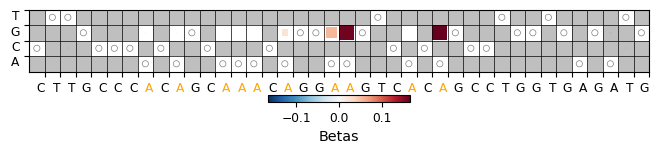

In [68]:
plot_millipede_heatmapV2('CD19_sg219_sigma_hit_table_everything.csv','presort_editing_freqs_sg219_everything.csv', 'wt_editing_freqs_sg219_everything.csv')

In [ ]:
millipede_dataframe = pd.read_csv('CD19_ABE8e_sigma_hit_table_ZP.csv', index_col = 0)

millipede_dataframe.reset_index(drop=False, inplace=True)

    #CleanUp dataframe

millipede_dataframe[['MainIndex','Base','Waste','BaseChange']] = millipede_dataframe['index'].str.extract('(^\d+)([A-Z])([->|-])([-]|[A-Z])')
millipede_dataframe = millipede_dataframe.dropna()
millipede_dataframe['BaseChange'] = millipede_dataframe.apply(lambda x: x['Base'] if x['BaseChange']=="-" else x['BaseChange'], axis=1)
millipede_dataframe['FinalIndex'] = millipede_dataframe['MainIndex'] + millipede_dataframe['Base']
millipede_dataframe = millipede_dataframe[millipede_dataframe['BaseChange'] != 'N']

#Generate Betas dataframe
millipede_dataframe_Betas = millipede_dataframe[['FinalIndex','BaseChange','Coefficient','MainIndex','Base']]
millipede_dataframe_Betas['MainIndex'] = millipede_dataframe_Betas['MainIndex'].astype(int)
millipede_dataframe_Betas = millipede_dataframe_Betas.sort_values(by='MainIndex', ascending=True)

#Generate PIPS dataframe
millipede_dataframe_PIPS = millipede_dataframe[['FinalIndex','BaseChange','PIP','MainIndex','Base']]
millipede_dataframe_PIPS['MainIndex'] = millipede_dataframe['MainIndex'].astype(int)
millipede_dataframe_PIPS = millipede_dataframe_PIPS.sort_values(by='MainIndex', ascending=True)


millipede_dataframe

/tmp/ipykernel_52134/2880442920.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millipede_dataframe_Betas['MainIndex'] = millipede_dataframe_Betas['MainIndex'].astype(int)
/tmp/ipykernel_52134/2880442920.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  millipede_dataframe_PIPS['MainIndex'] = millipede_dataframe['MainIndex'].astype(int)


,index,PIP,Coefficient,Coefficient StdDev,Conditional Coefficient,Conditional Coefficient StdDev,MainIndex,Base,Waste,BaseChange,FinalIndex
0,21T>C,0.002079,0.000057,0.002054,0.033305,0.036591,21,T,>,C,21T
1,23T>C,0.001627,0.000081,0.002558,0.041877,0.040324,23,T,>,C,23T
2,28A>G,0.009664,0.001066,0.010257,0.083130,0.037150,28,A,>,G,28A
3,31T>C,0.003243,0.000404,0.009140,0.074057,0.099380,31,T,>,C,31T
4,35T>C,0.001179,0.000004,0.000438,0.042920,0.000000,35,T,>,C,35T
...,...,...,...,...,...,...,...,...,...,...,...
132,319A>G,0.010843,0.000194,0.004390,0.070558,0.045222,319,A,>,G,319A
133,320A>G,0.037763,0.005127,0.023998,0.105850,0.035062,320,A,>,G,320A
134,321A>G,0.009177,0.001078,0.010785,0.096334,0.034906,321,A,>,G,321A
135,322A>G,0.001145,0.000005,0.001801,0.004007,0.051251,322,A,>,G,322A
